# Research Project
COMP 435 Introduction to Machine Learning, Spring 2025

- Instructor: Jon Hutchins
- Author: Ina Tang
- Dataset: Sentiment140 on [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140/data)
- Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

> Just 75% accuracy would be good... – Dr. Hutchins

### Schema
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY. 
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

### Ideas

- [ ] Proportions of + and -
- [ ] Total frequency of word
    - [ ] remove pronouns, prepositions, conjunctions, article adjectives, etc. ?
    - [ ] cutoff for words with (say) less than 1% frequency 
- [ ] Correlation between word and each label (porportions)
- [ ] Affect of capitalization and punctuations on prediction
- [ ] Use deep neural network(s) to identify strong FPs and FNs (weird data points)
- [ ] (Synthesized feature) Certain collection(s) of words that strongly correlates with one of the labels


### Previous labs
- [Linear Regression with a Real Dataset](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb)
- [Linear Regression with Synthetic Data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)
- [Logistic Regression](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/core/logistic_regression_core.ipynb)

In [5]:
# pip install numpy pandas torch matplotlib seaborn

In [6]:
import numpy as np
import pandas as pd
# import torch
import matplotlib.pyplot as plt
import seaborn as sns  # sns.pairplot

from typing import Dict, List

In [7]:
# generated by GitHub Copilot with minor edits

# Load & setup
# runtime: 5s
df = pd.read_csv('data.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']  # target: 0 = negative, 4 = positive
df['target'] = df['target'].replace({4: 1})  # Replace 4s (positives) with 1s in the 'target' column
print(df.head())

NUMBER_OF_TARGET_VALUES = 2

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [8]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

In [9]:
print(f"Total number of examples: {df['target'].value_counts().sum()}")

Total number of examples: 1600000


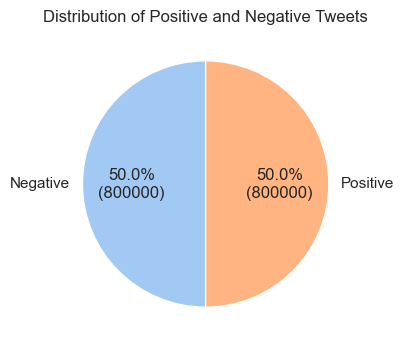

In [10]:
# Plot ratio of positive and negative tweets
# runtime: 0s



def func(pct, allvals):
    absolute = int(np.round(pct / 100. * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

# Data for the pie chart
data = df['target'].value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    data, 
    labels=['Negative', 'Positive'],  # Adjust labels as needed
    autopct=lambda pct: func(pct, data), 
    startangle=90, 
    colors=sns.color_palette("pastel")[:len(data)]  # Use seaborn color palette
)
plt.title('Distribution of Positive and Negative Tweets')
plt.show()

## Word Count

In [11]:
# generated by GitHub Copilot with minor edits
# runtime: 45s

print("Counting words...")
word_counts: Dict[str, Dict[int, int]] = {}  # word -> target -> frequency

for i, row in df.iterrows():
    words: List[str] = list(set(row['text'].split()))
    target: int = row['target']
    for word in words:
        if word in word_counts:
            word_counts[word][target] += 1
        else:
            word_counts[word] = {0: 0, 1: 0}  # initialize
            word_counts[word][target] = 1

print("Sorting words by total frequency...")  # runtime: 1s
word_counts = {k: v for k, v in sorted(word_counts.items(), key=lambda item: sum(item[1].values()), reverse=True)}  # sort by counts

Counting words...
Sorting words by total frequency...


In [12]:
# print(word_counts)

In [13]:
# generated by GitHub Copilot with minor edits
# runtime: 15s
word_counts_df = pd.DataFrame(word_counts).T.reset_index()
word_counts_df.columns = ['word', 'neg', 'pos']
# pos: number of positive examples which contains the word
word_counts_df['total'] = word_counts_df['neg'] + word_counts_df['pos']
word_counts_df.head()

,word,neg,pos,total
0,to,243891,205548,449439
1,the,198554,204706,403260
2,I,225262,157744,383006
3,a,154666,166868,321534
4,my,148772,103172,251944


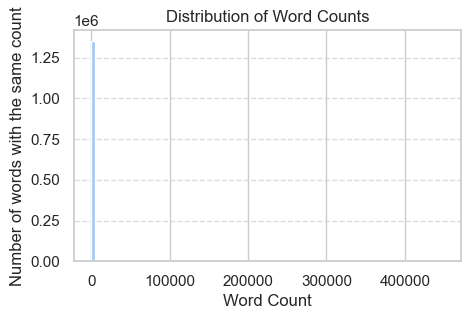

In [14]:
# generated by GitHub Copilot with minor edits

# Plot the distribution of the words
plt.figure(figsize=(5, 3))
# sns.kdeplot(word_counts_df['total'], fill=True, color=sns.color_palette("pastel")[0], alpha=0.7)
plt.hist(word_counts_df['total'], bins=100, color=sns.color_palette("pastel")[0])
# TODO: Fix the following line
# plt.stairs(word_counts_df['total'], color=sns.color_palette("pastel")[0])
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of words with the same count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Since most words appears only a few times in the entire dataset, the plot is strongly right-skewed. We can verify that the plot is not just one bar but is in fact right-skewed with the following operation: 

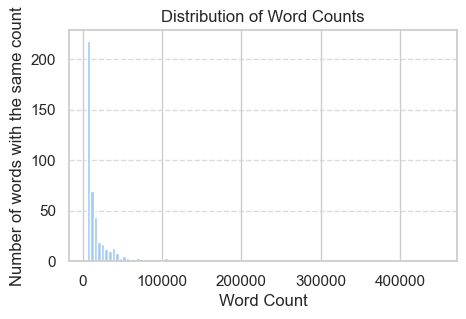

In [15]:
# remove words that appear only a certain number of times in the dataset to visualize the distribution better
word_counts_trimmed_df = word_counts_df[word_counts_df['total'] > 5000]

# plot the distribution of the words again
plt.figure(figsize=(5, 3))
plt.hist(word_counts_trimmed_df['total'], bins=100, color=sns.color_palette("pastel")[0])
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of words with the same count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can remove article adjectives, conjunctions, prepositions, etc. to see better if there are particular words that or collections of words are correlated to positive or negative emotion. 

In [16]:
# generated by GitHub Copilot with minor edits
pronouns: List[str] = ['i', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'whose', 'this', 'that', 'these', 'those']  
helping_verbs: List[str] = ['am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'shall', 'will', 'should', 'would', 'may', 'might', 'must', 'can', 'could']
article_adj: List[str] = ['a', 'an', 'the']
conjunctions: List[str] = ['and', 'but', 'or', 'nor', 'for', 'yet', 'so']
prepositions: List[str] = ['aboard', 'about', 'above', 'across', 'after', 'against', 'along', 'among', 'around', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'by', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'like', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'past', 'since', 'through', 'throughout', 'to', 'toward', 'under', 'underneath', 'until', 'up', 'upon', 'with', 'within', 'without']
neutral_words: List[str] = pronouns + helping_verbs + article_adj + conjunctions + prepositions

word_counts_filtered_df = word_counts_df[~word_counts_df['word'].str.lower().isin(neutral_words)]
word_counts_filtered_df.head()

,word,neg,pos,total
22,just,48767,45315,94082
23,I'm,52391,40770,93161
25,not,59359,25921,85280
27,get,42487,31566,74053
31,all,33968,31831,65799


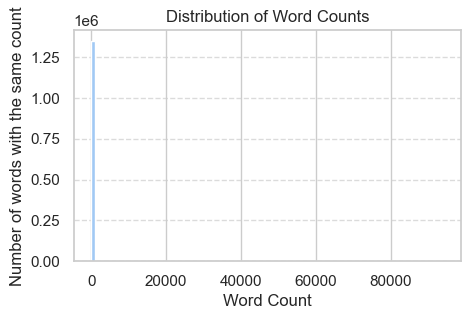

In [17]:
# Plot again
plt.figure(figsize=(5, 3))
plt.hist(word_counts_filtered_df['total'], bins=100, color=sns.color_palette("pastel")[0])
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of words with the same count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# OK I need to do another plot

Now we can actually see somethings from the data...We can create a another column representing the relative frequency of positive tweets associated with the word. 

In [18]:
# generated by GitHub Copilot with minor edits

word_counts_filtered_df['pos_ratio'] = word_counts_filtered_df['pos'] / word_counts_filtered_df['total']
word_counts_filtered_df['intensity'] = abs(word_counts_filtered_df['pos_ratio'] - 0.5) / 0.5  # [0, 1], how strongly the word is correlated with either positive or negative
word_counts_filtered_df = word_counts_filtered_df.sort_values(by='intensity', ascending=False)

word_counts_filtered_df.head()

/var/folders/jf/9yw5p_gd5fn_t20w9pgwzdv80000gn/T/ipykernel_89528/54581162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_counts_filtered_df['pos_ratio'] = word_counts_filtered_df['pos'] / word_counts_filtered_df['total']
/var/folders/jf/9yw5p_gd5fn_t20w9pgwzdv80000gn/T/ipykernel_89528/54581162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_counts_filtered_df['intensity'] = abs(word_counts_filtered_df['pos_ratio'] - 0.5) / 0.5  # [0, 1], how strongly the word is correlated with either pos

,word,neg,pos,total,pos_ratio,intensity
675485,#theregister,1,0,1,0.0,1.0
900514,@boinzy,0,1,1,1.0,1.0
900512,"@mukund,",0,1,1,1.0,1.0
900511,stellie!,0,1,1,1.0,1.0
900510,http://tinyurl.com/o7r24x,0,1,1,1.0,1.0


This is not good...we'll remove the values that only occurs once in the whole dataset. 

In [19]:
word_counts_filtered_df = word_counts_filtered_df[word_counts_filtered_df['total'] > 10]
word_counts_filtered_df.head()

,word,neg,pos,total,pos_ratio,intensity
63389,PERFORM,11,0,11,0.0,1.0
63605,broken!!,11,0,11,0.0,1.0
63562,greatly...,11,0,11,0.0,1.0
63344,feverish.,11,0,11,0.0,1.0
63129,Ouchy,11,0,11,0.0,1.0


OK now we see some examples that might cause overfitting :) The association of words like "Hihi" or "LOVEEE" with positives and "horrific." with negatives is reasonable, but it's extra interesting how some "www.youtube.com/Titomi15..WATCH" appear only in positive tweets and "beejive" only negative. 

A synthetic feature weighting total and intensity would be helpful. 

In [21]:
# modify intensity to account for trustworthiness / quantity / total
word_counts_filtered_df['intensity'] = abs(word_counts_filtered_df['pos_ratio'] - 0.5) / 0.5 * word_counts_filtered_df['total']
word_counts_filtered_df = word_counts_filtered_df.sort_values(by='intensity', ascending=False)
word_counts_filtered_df.head()

,word,neg,pos,total,pos_ratio,intensity
25,not,59359,25921,85280,0.303952,33438.0
76,miss,27753,4658,32411,0.143717,23095.0
43,love,12800,35220,48020,0.733444,22420.0
44,no,34460,13148,47608,0.276172,21312.0
46,work,32027,12681,44708,0.283641,19346.0
